<a href="https://colab.research.google.com/github/usshaa/Colabnb/blob/main/POTHOLE_DETECTION_CODE_PYTHON.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [35]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
atulyakumar98_pothole_detection_dataset_path = kagglehub.dataset_download('atulyakumar98/pothole-detection-dataset')

print('Data source import complete.')


Data source import complete.


In [37]:
#pothole detection
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/pothole-detection-dataset/normal/208.jpg
/kaggle/input/pothole-detection-dataset/normal/333.jpg
/kaggle/input/pothole-detection-dataset/normal/45.jpg
/kaggle/input/pothole-detection-dataset/normal/56.jpg
/kaggle/input/pothole-detection-dataset/normal/89.jpg
/kaggle/input/pothole-detection-dataset/normal/20.jpg
/kaggle/input/pothole-detection-dataset/normal/275.jpg
/kaggle/input/pothole-detection-dataset/normal/212.jpg
/kaggle/input/pothole-detection-dataset/normal/239.jpg
/kaggle/input/pothole-detection-dataset/normal/58.jpg
/kaggle/input/pothole-detection-dataset/normal/150.jpg
/kaggle/input/pothole-detection-dataset/normal/6.jpg
/kaggle/input/pothole-detection-dataset/normal/109.jpg
/kaggle/input/pothole-detection-dataset/normal/149.jpg
/kaggle/input/pothole-detection-dataset/normal/187.jpg
/kaggle/input/pothole-detection-dataset/normal/76.jpg
/kaggle/input/pothole-detection-dataset/normal/71.jpg
/kaggle/input/pothole-detection-dataset/normal/342.jpg
/kaggle/input/potho

**Adding Libraries**

In [38]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import cv2
import matplotlib.pyplot as plt

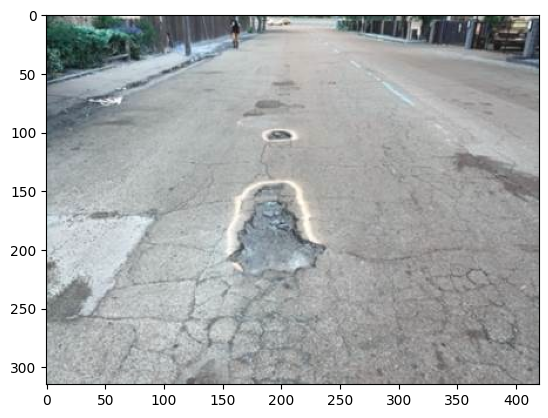

In [39]:
plt.imshow(cv2.imread("/kaggle/input/pothole-detection-dataset/potholes/125.jpg"))

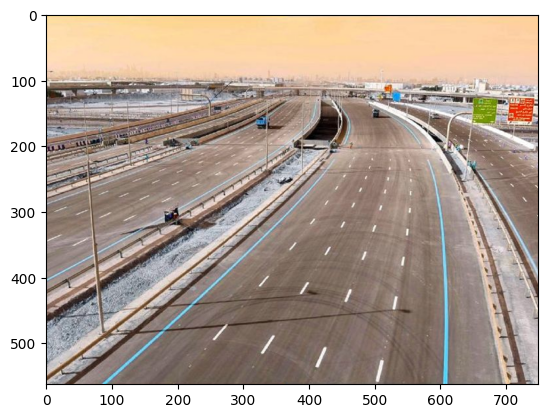

In [40]:
plt.imshow(cv2.imread("/kaggle/input/pothole-detection-dataset/normal/11.jpg"))

In [41]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True,
                                   validation_split=0.2)
training_set = train_datagen.flow_from_directory('/kaggle/input/pothole-detection-dataset',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary',
                                                 subset="training")

Found 546 images belonging to 2 classes.


In [42]:
validation_generator = train_datagen.flow_from_directory(
    "/kaggle/input/pothole-detection-dataset", # same directory as training data
    target_size=(64, 64),
    batch_size=32,
    class_mode='binary',
    subset='validation')

Found 135 images belonging to 2 classes.


**Initialising the CNN**

In [43]:
cnn = tf.keras.models.Sequential()
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[64, 64, 3]))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
cnn.add(tf.keras.layers.Flatten())
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))
cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
cnn.fit(x = training_set, validation_data = validation_generator, epochs = 25)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/25
18/18 ━━━━━━━━━━━━━━━━━━━━ 21s 998ms/step - accuracy: 0.5572 - loss: 0.6742 - val_accuracy: 0.7259 - val_loss: 0.5252
Epoch 2/25
18/18 ━━━━━━━━━━━━━━━━━━━━ 20s 1s/step - accuracy: 0.6639 - loss: 0.5731 - val_accuracy: 0.7852 - val_loss: 0.4852
Epoch 3/25
18/18 ━━━━━━━━━━━━━━━━━━━━ 17s 977ms/step - accuracy: 0.8534 - loss: 0.4125 - val_accuracy: 0.7852 - val_loss: 0.4255
Epoch 4/25
18/18 ━━━━━━━━━━━━━━━━━━━━ 17s 934ms/step - accuracy: 0.8927 - loss: 0.2594 - val_accuracy: 0.8148 - val_loss: 0.4737
Epoch 5/25
18/18 ━━━━━━━━━━━━━━━━━━━━ 20s 1s/step - accuracy: 0.8753 - loss: 0.2781 - val_accuracy: 0.8519 - val_loss: 0.3684
Epoch 6/25
18/18 ━━━━━━━━━━━━━━━━━━━━ 17s 927ms/step - accuracy: 0.9015 - loss: 0.2282 - val_accuracy: 0.8222 - val_loss: 0.4368
Epoch 7/25
18/18 ━━━━━━━━━━━━━━━━━━━━ 17s 944ms/step - accuracy: 0.9157 - loss: 0.1958 - val_accuracy: 0.8222 - val_loss: 0.5135
Epoch 8/25
18/18 ━━━━━━━━━━━━━━━━━━━━ 21s 963ms/step - accuracy: 0.9122 - loss: 0.2103 - val_accuracy: 

**Making a single prediction (RESULT)**

In [44]:
import numpy as np
from keras.preprocessing import image
test_image = image.load_img('/kaggle/input/pothole-detection-dataset/normal/341.jpg', target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)
training_set.class_indices
if result[0][0] == 1:
  prediction = 'pothole'
else:
  prediction = 'normal'

#final result
print(prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step
pothole


In [45]:
import numpy as np
from keras.preprocessing import image
import matplotlib.pyplot as plt
import cv2

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


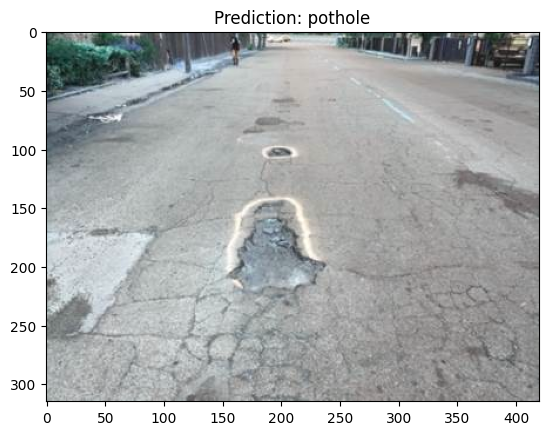

In [46]:
# Test with a sample pothole image
test_image_pothole_path = '/kaggle/input/pothole-detection-dataset/potholes/125.jpg'
test_image_pothole = image.load_img(test_image_pothole_path, target_size = (64, 64))
test_image_pothole_array = image.img_to_array(test_image_pothole)
test_image_pothole_expanded = np.expand_dims(test_image_pothole_array, axis = 0)
result_pothole = cnn.predict(test_image_pothole_expanded)

plt.imshow(cv2.imread(test_image_pothole_path))
plt.title(f"Prediction: {'pothole' if result_pothole[0][0] == 1 else 'normal'}")
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


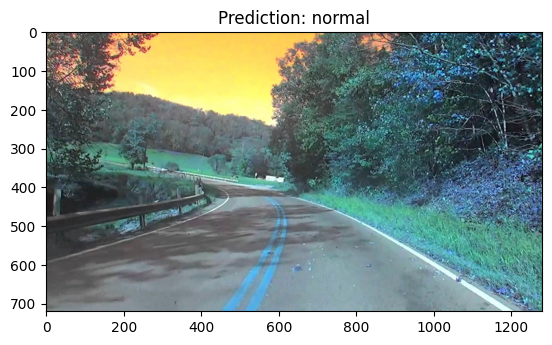

In [50]:
# Test with a sample normal image
test_image_normal_path = '/kaggle/input/pothole-detection-dataset/normal/3.jpg'
test_image_normal = image.load_img(test_image_normal_path, target_size = (64, 64))
test_image_normal_array = image.img_to_array(test_image_normal)
test_image_normal_expanded = np.expand_dims(test_image_normal_array, axis = 0)
result_normal = cnn.predict(test_image_normal_expanded)

plt.imshow(cv2.imread(test_image_normal_path))
plt.title(f"Prediction: {'pothole' if result_normal[0][0] == 1 else 'normal'}")
plt.show()

In [48]:
from sklearn.metrics import confusion_matrix, classification_report

# Get true labels
# Reset the validation_generator to ensure the order of predictions matches the labels
# validation_generator.reset()
true_labels = validation_generator.classes

# Get predictions (already computed in cell e8c5910c)
predictions = (cnn.predict(validation_generator) > 0.5).astype(int)

# Generate confusion matrix
cm = confusion_matrix(true_labels, predictions)

# Display the confusion matrix
print("Confusion Matrix:")
print(cm)

# Generate classification report
report = classification_report(true_labels, predictions)

# Display the classification report
print("\nClassification Report:")
print(report)

5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 479ms/step
Confusion Matrix:
[[33 37]
 [33 32]]

Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.47      0.49        70
           1       0.46      0.49      0.48        65

    accuracy                           0.48       135
   macro avg       0.48      0.48      0.48       135
weighted avg       0.48      0.48      0.48       135

